# Not yet correct (possibly)

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 12) # set default size of plots
plt.rcParams.update({'font.size': 18}) # set default font size
plt.rcParams['image.cmap']='inferno' # set color map

In [55]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

In [90]:
### Parameter ###

L=100

#################

X=np.zeros((1,L),dtype='int') # initialize (we will use np.append to append to this)
X[0,:]=np.arange(L)

time=0.0
times_list=[]
start_times=[] # just here for plotting

rate=L # ??????
beta=1.0/rate

while True: # loop until done 
    wait=np.random.exponential(beta) # wait time
    times_list.append((time,time+wait))
    start_times.append(time)
    time+=wait
    
    old=X[-1,:] # index -1 is useful. In this case it gives the last row
    new=old.copy() # make a copy
    
    type_to_spread=np.random.choice(old) 
    
    idx=None
    while idx==None:
        idx=np.random.choice(np.arange(L))
        if old[idx]==type_to_spread: # ???????
            idx=None
    new[idx]=type_to_spread # infect
    
    new=np.sort(new)
    
    if(am_done(new)):
        break
    
    X=np.append(X,[new],axis=0)
    
    
X=np.append(X,[new],axis=0)
inf=1e3
times_list.append((time,time+inf))
start_times.append(time)

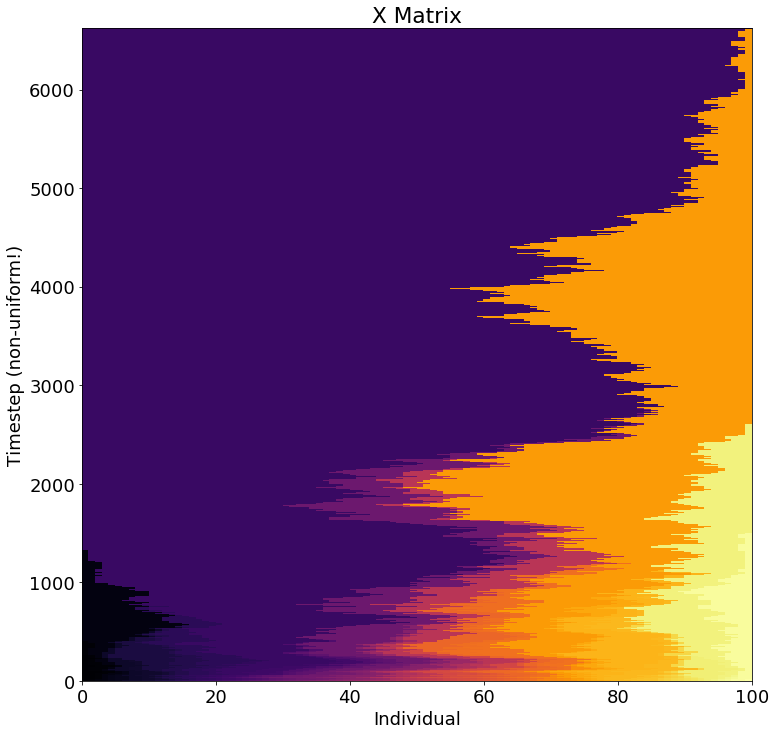

In [91]:
plt.pcolor(X) # Plot dynamics!
plt.title('X Matrix')
plt.xlabel('Individual')
plt.ylabel('Timestep (non-uniform!)')

In [92]:
def X_to_N(X):
    N=np.zeros_like(X)
    length=np.shape(N)[0]
    L=np.shape(N)[1]
    for row in range(length):
        row_list=list(X[row,:])
        for i in range(L):
            N[row,i]=row_list.count(i)   
    return N

In [93]:
N=X_to_N(X)

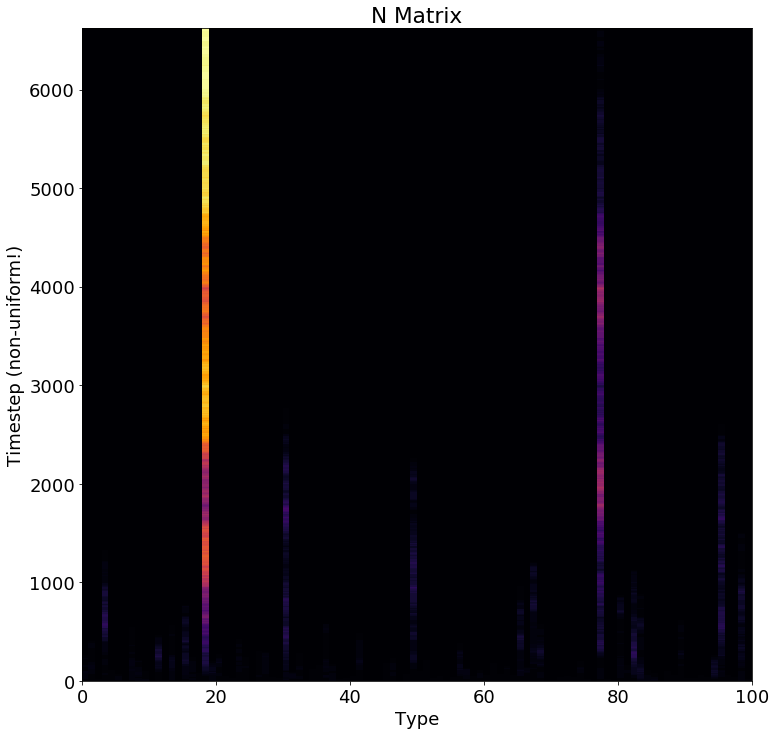

In [94]:
plt.pcolor(N) # Plot dynamics!
plt.title('N Matrix')
plt.xlabel('Type')
plt.ylabel('Timestep (non-uniform!)')

In [95]:
def plot_path_true(tlst,n,col): # this is too slow unfortunately 
    length=len(tlst)
    for i in range(length):
        t=tlst[i]
        plt.plot([t[0],t[1]],[n[i],n[i]],c=col,lw=3)

In [96]:
def plot_path_quick(tlst,n,col): # quicker
    plt.plot(tlst,n,c=col,lw=3)

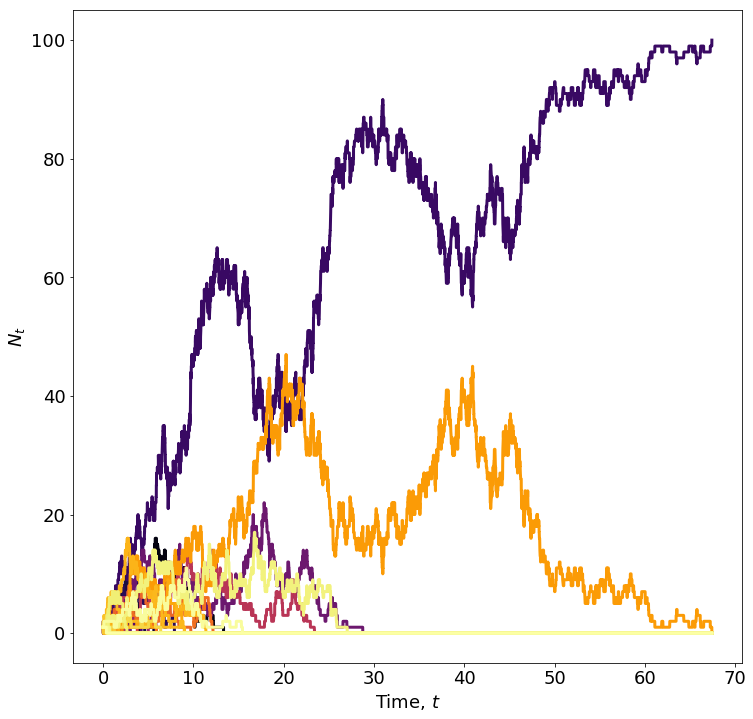

In [97]:
import matplotlib
import matplotlib.cm as cm

norm = matplotlib.colors.Normalize(vmin=0, vmax=L-1) # we want the same colors as for our heatmaps above!
mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

# for i in range(L):
#     plot_path_true(times_list,N[:,i],mapper.to_rgba(i)) # TOO SLOW :(

for i in range(L):
    plot_path_quick(start_times,N[:,i],mapper.to_rgba(i))
    
plt.xlabel('Time, $t$')
plt.ylabel('$N_t$')

# plt.yscale('log')

3